### Partie 4 : Visualisation (3-4h)

**Competence evaluee : C2.4 - Presenter des donnees analysees de facon intelligible**

#### Etape 4.1 : Graphiques Matplotlib
Produire les visualisations suivantes avec Matplotlib :

1. Evolution temporelle de la consommation totale par type d'energie (line plot)
2. Distribution des consommations par type de batiment (boxplot)
3. Heatmap consommation moyenne par heure et jour de semaine
4. Scatter plot temperature vs consommation de chauffage avec regression
5. Comparaison consommation par classe energetique (bar chart)

Chaque graphique doit inclure : titre explicite, labels des axes avec unites, legende, annotations pertinentes.

**Livrables** :
- Notebook `09_visualisations_matplotlib.ipynb`
- 5 figures PNG (300 dpi) dans `output/figures/`

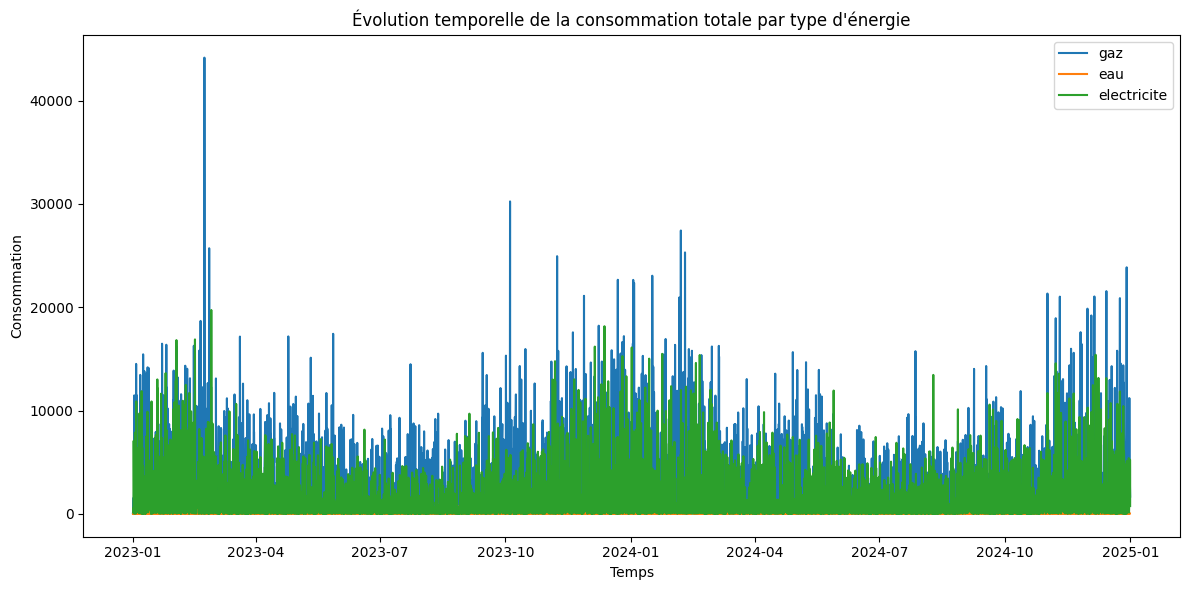

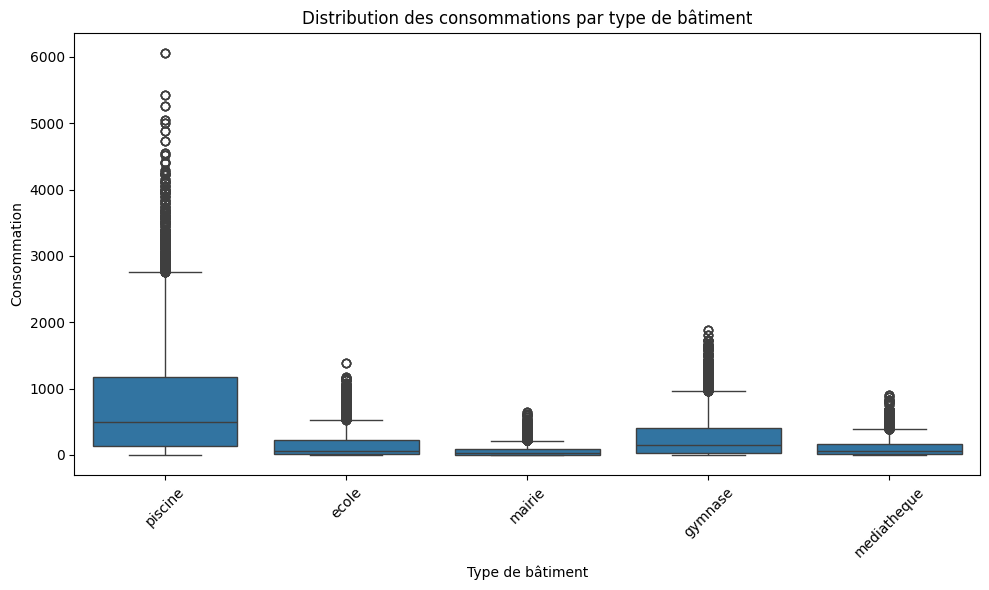

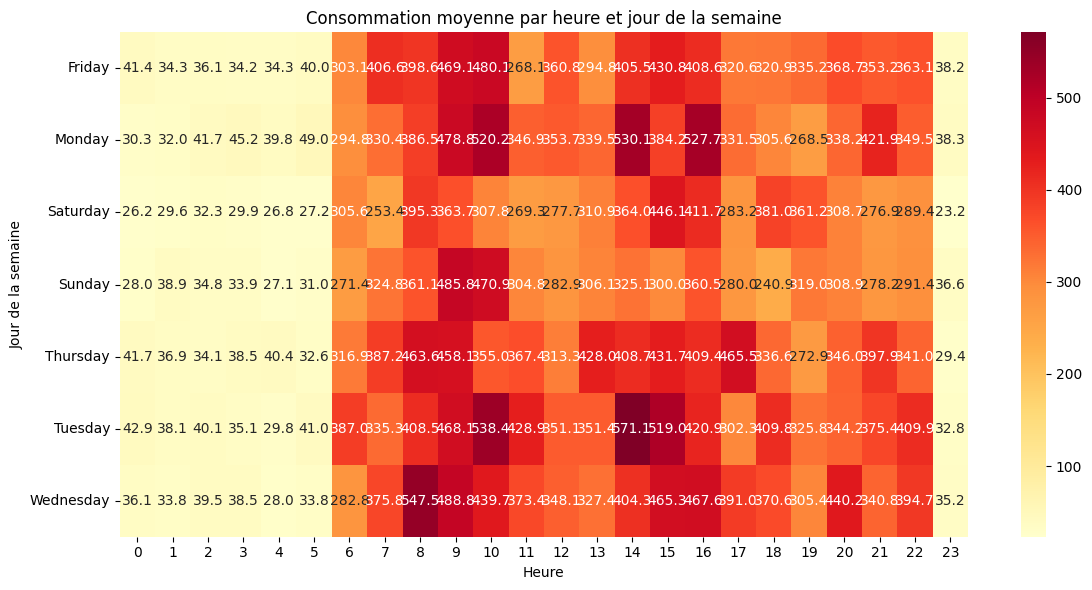

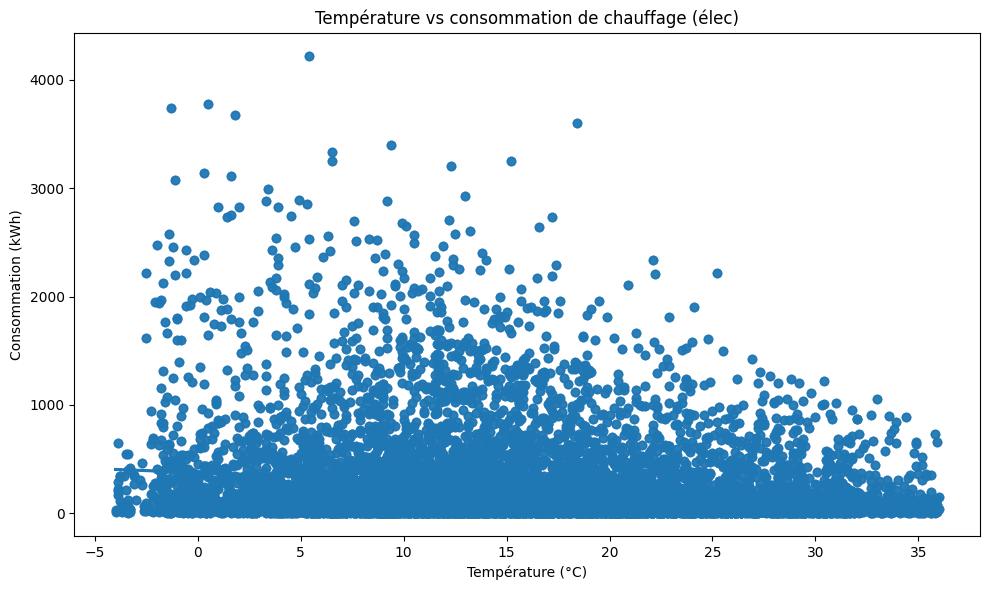

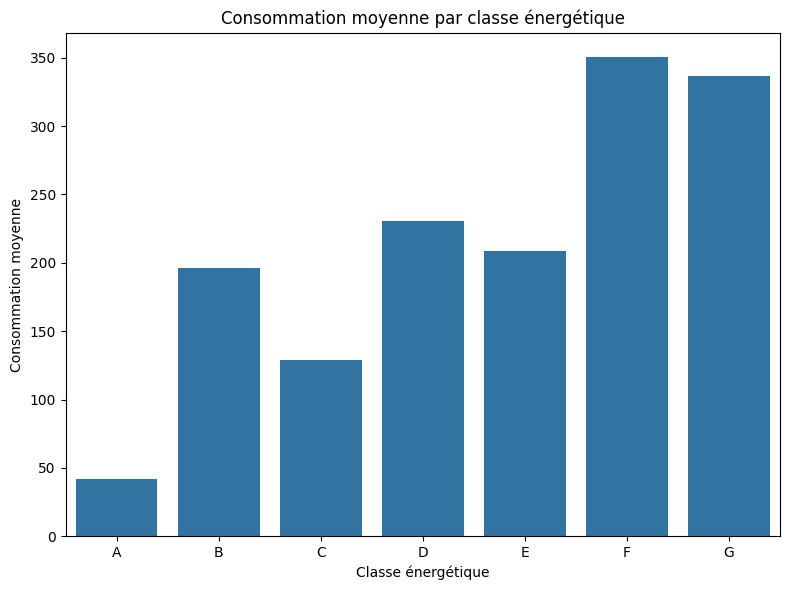

In [ ]:
# Notebook 09_visualisations_matplotlib.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# imports
df = pd.read_csv("../output/consommations_enrichies.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['heure'] = df['timestamp'].dt.hour
df['jour_semaine'] = df['timestamp'].dt.day_name()


# 1. Evolution temporelle de la consommation totale par type d'energie (line plot)

df_line = df.groupby(['timestamp','type_energie'])['consommation'].sum().reset_index()
plt.figure(figsize=(12,6))
for energy in df_line['type_energie'].unique():
    subset = df_line[df_line['type_energie'] == energy]
    plt.plot(subset['timestamp'], subset['consommation'], label=energy)
plt.title("Évolution temporelle de la consommation totale par type d'énergie")
plt.xlabel("Temps")
plt.ylabel("Consommation")
plt.legend()
plt.tight_layout()
plt.savefig("../output/figures/consommation_evolution.png", dpi=300)
plt.show()
plt.close()

# 2. Distribution des consommations par type de batiment (boxplot)

plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='consommation', data=df)
plt.title("Distribution des consommations par type de bâtiment")
plt.xlabel("Type de bâtiment")
plt.ylabel("Consommation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../output/figures/consommation_par_batiment.png", dpi=300)
plt.show()
plt.close()

# 3. Heatmap consommation moyenne par heure et jour de semaine

df_heat = df.groupby(['jour_semaine','heure'])['consommation'].mean().unstack()
plt.figure(figsize=(12,6))
sns.heatmap(df_heat, cmap='YlOrRd', annot=True, fmt=".1f")
plt.title("Consommation moyenne par heure et jour de la semaine")
plt.xlabel("Heure")
plt.ylabel("Jour de la semaine")
plt.tight_layout()
plt.savefig("../output/figures/consommation_heatmap.png", dpi=300)
plt.show()
plt.close()

# 4. Scatter plot temperature vs consommation de chauffage avec regression
df_chauffage = df[df['type_energie'] == 'electricite']  
plt.figure(figsize=(10,6))
sns.regplot(x='temperature_c', y='consommation', data=df_chauffage, scatter_kws={'alpha':0.5})
plt.title("Température vs consommation de chauffage (élec)")
plt.xlabel("Température (°C)")
plt.ylabel("Consommation (kWh)")
plt.tight_layout()
plt.savefig("../output/figures/temp_vs_chauffage.png", dpi=300)
plt.show()
plt.close()

# 5. Comparaison consommation par classe energetique (bar chart)
df_bar = df.groupby('classe_energetique')['consommation'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='classe_energetique', y='consommation', data=df_bar, order=sorted(df_bar['classe_energetique']))
plt.title("Consommation moyenne par classe énergétique")
plt.xlabel("Classe énergétique")
plt.ylabel("Consommation moyenne")
plt.tight_layout()
plt.savefig("../output/figures/consommation_par_classe.png", dpi=300)
plt.show()
plt.close()
